In [131]:
import cv2
import pytesseract
import matplotlib
from matplotlib import pyplot as plt

In [132]:
path1="../input/newones/H6.PNG" #yes
path2="../input/excellent/Ac.PNG" #yes
path3="../input/excellent1/LA.PNG" #yes
path4="../input/excellent1/PO.PNG" #yes
path5="../input/newones/He1.PNG"  # ok
path6="../input/newones/He2.PNG"  #tig for thing
path7="../input/newones/He5.PNG"#yes



In [133]:
#Image Text Extraction

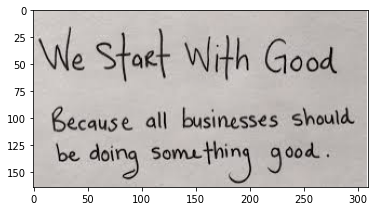

In [134]:
%matplotlib inline
#for i in range(1,11):
img=cv2.imread(path4)
plt.imshow(img)
plt.show()


In [135]:
m=pytesseract.image_to_string(img, config="--oem 3 --psm 6")
print(m)

\We Staet With Good
Gecause all businesses should
be aoe sort geod.


In [137]:
#"""
#import matplotlib.image as mpimg
##for img in os.listdir("/content/train"): 
#image = mpimg.imread(path2)
#plt.imshow(image)
#plt.show()
#"""

In [71]:
#Image Textual Recognition

In [139]:
def bounding_boxes(path):
    %matplotlib inline
    #for i in range(1,11):
    img=cv2.imread(path)
    plt.imshow(img)
    plt.show()

    h, w, c = img.shape
    boxes = pytesseract.image_to_boxes(img)
    for b in boxes.splitlines():
        b = b.split(' ')
        img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
    #creates bounding boxes
    plt.imshow(img)
    plt.show()
    from pytesseract import Output
    d = pytesseract.image_to_data(img, output_type=Output.DICT)
    print(d.keys())
    n_boxes = len(d['text'])
    for i in range(n_boxes):
        if int(d['conf'][i]) > 60:
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (255,255, 0), 2)
    plt.imshow(img)
    plt.show()

In [ ]:
bounding_boxes(path4)

In [77]:
import numpy as np


In [ ]:
#Image PreProcessing

In [140]:
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



In [141]:
# noise removal
def remove_noise(image):
    return cv2.medianBlur(image, 5)


In [142]:

# thresholding
def thresholding(image):
    #img_blur = cv2.medianBlur(self.cropped_img,5).astype('uint8')
    #img_thresh_Gaussian = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    #return im_thresh_Gaussian
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


In [143]:
# dilation
def dilate(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.dilate(image, kernel, iterations=1)



In [144]:
# erosion
def erode(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.erode(image, kernel, iterations=1)

In [145]:
# opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)


In [146]:
# canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

In [147]:
# skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated


In [148]:

# template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

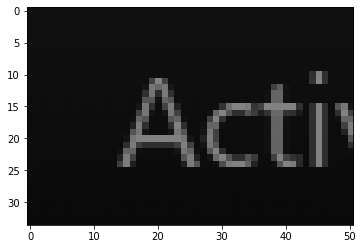

In [169]:
from PIL import Image
#img = cv2.imread('../input/excellent1/PO.PNG')
img = cv2.imread(path2)
plt.imshow(img)

In [170]:


#img2=Image.open('../input/excellent/Ac.PNG')
# Adding custom options
custom_config = r'--oem 3 --psm 6'
print("Main Image\n>"+ pytesseract.image_to_string(img, config=custom_config))
gray = get_grayscale(img)
print("Gray Image\n>"+ pytesseract.image_to_string(gray, config=custom_config))
thresh = thresholding(gray)
print("Thresh Image\n>"+ pytesseract.image_to_string(thresh, config=custom_config))



dilated = dilate(img)
print("Dilated Image\n>"+ pytesseract.image_to_string(dilated, config=custom_config))
eroded = erode(img)
print("Eroded Image\n>"+ pytesseract.image_to_string(eroded, config=custom_config))

Main Image
>Acti
Gray Image
>Acti
Thresh Image
>zavaah
Dilated Image
>
Eroded Image
>


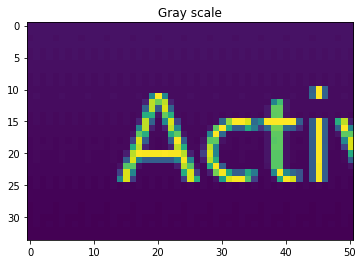

TypeError: Image data of dtype object cannot be converted to float

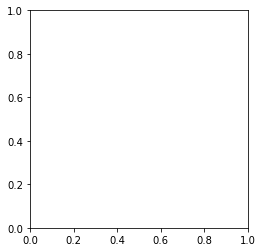

In [171]:
%matplotlib inline
#pytesseract.pytesseract.tesseract_cmd = r'C:\Users\family\AppData\Local\Tesseract-OCR\tesseract.exe'

plt.imshow(gray)
plt.title("Gray scale")
plt.show()
%matplotlib inline
plt.imshow(opening)
plt.title("opening")
plt.show()
%matplotlib inline
plt.imshow(thresh)
plt.title("thresh")
plt.show()
%matplotlib inline
plt.imshow(eroded)
plt.title("eroded")
plt.show()
%matplotlib inline
plt.imshow(dilated)
plt.title("dilated")
plt.show()